## Import the library

In [245]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import numpy as np
%matplotlib inline

In [246]:
import warnings
warnings.filterwarnings('ignore')

## Read the data from csv file 

In [247]:
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [248]:
print(data.shape[0],data.shape[1])

284807 31


In [249]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [250]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [251]:
data.isnull().sum().max()

0

#### Determine the number of fradulent cases in dataset

In [252]:

print('Normal Transactions count:',data['Class'].value_counts().values[0])
print('Fraudulent Transactions count:',data['Class'].value_counts().values[1])

Normal Transactions count: 284315
Fraudulent Transactions count: 492


In [253]:
print('Normal transactions are',(data['Class'].value_counts().values[0]/data.shape[0])*100,'% of the dataset')
print('Fraudulent transactions are',(data['Class'].value_counts().values[1]/data.shape[0])*100,'% of the dataset')

Normal transactions are 99.82725143693798 % of the dataset
Fraudulent transactions are 0.1727485630620034 % of the dataset


##Exploratory analysis

Visualization of Transaction class distribution

Text(0, 0.5, 'Frequency')

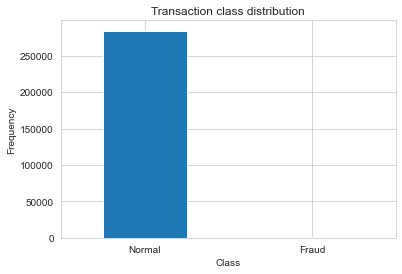

In [254]:
count_class=pd.value_counts(data['Class'],sort=True)
count_class.plot(kind='bar',rot=0)
plt.title('Transaction class distribution')
LABELS=['Normal','Fraud']
plt.xticks(range(2),LABELS)
plt.xlabel('Class')
plt.ylabel('Frequency')

##Visualization of Amount and Time Distribution

(0.0, 172792.0)

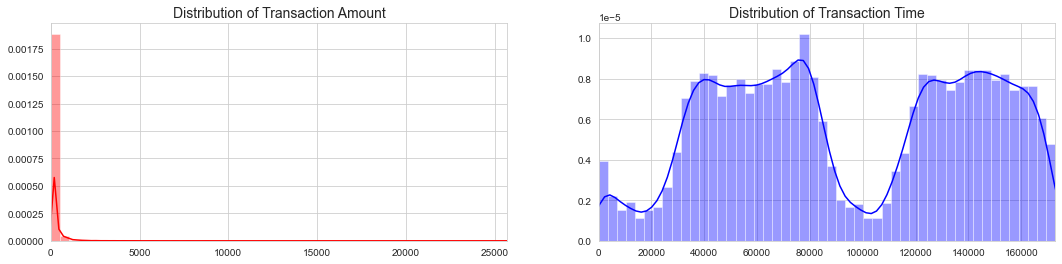

In [255]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = data['Amount'].values
time_val = data['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

##Visualization of Amount and Time by class

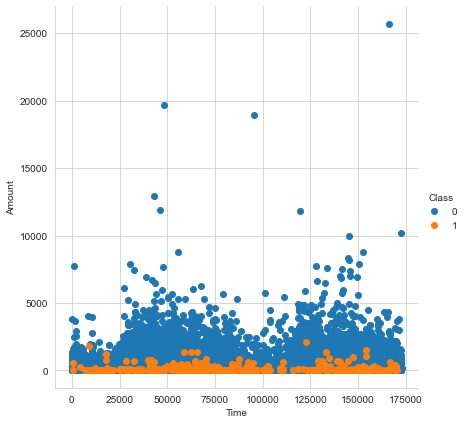

In [256]:
sns.set_style("whitegrid")
sns.FacetGrid(data, hue="Class", size = 6).map(plt.scatter, "Time", "Amount").add_legend()
plt.show()

##From the above graphs,we can conclude that the fraud transactions are evenly distributed throughout time

##Get sense of the fraud and normal transaction amount

In [257]:
fraud=data[data['Class']==1]
normal=data[data['Class']==0]
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [258]:
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

Normalization of data

Scaling is done to normalise the data within a particular range.
Since most of our data has already been scaled we should scale the columns that are left to scale (Amount and Time)
RobustScaler reduces the influence of outliers



In [259]:
from sklearn.preprocessing import StandardScaler,RobustScaler

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

data['scaled_amount'] = std_scaler.fit_transform(data['Amount'].values.reshape(-1,1))
data['scaled_time'] = rob_scaler.fit_transform(data['Time'].values.reshape(-1,1))

data.drop(['Time','Amount'], axis=1, inplace=True)

In [260]:
scaled_amount = data['scaled_amount']
scaled_time = data['scaled_time']

data.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
data.insert(0, 'scaled_amount', scaled_amount)
data.insert(1, 'scaled_time', scaled_time)

Normalization is a process by which we scale values to be between specified limits, usually -1 to 1 or 0 to 1. This process is important because our machine learning models are heavily affected by differences in number size. The major difference will cause massive inaccuracies in our model. Normalization helps us to eliminate these sources of error rather than having it propagate throughout our analysis.

In [261]:
data = data.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_df = data.loc[data['Class'] == 1]
non_fraud_df = data.loc[data['Class'] == 0][:492]
normal_distributed_df = pd.concat([fraud_df, non_fraud_df])
# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)
new_df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
143798,-0.207259,0.010985,-1.114596,0.870065,1.698331,0.171602,-0.567547,-0.380107,0.256644,0.582491,...,-0.116646,-0.061613,-0.359915,-0.131732,0.528597,0.301527,0.276896,-0.129035,-0.021198,0
96789,0.052576,-0.220350,-3.593476,0.781442,-1.822448,0.605761,-1.194656,-0.517195,-1.722523,0.128890,...,-0.478219,0.351792,0.391249,-0.252875,-0.498042,0.010172,0.909929,-1.478767,0.722673,1
184828,-0.073443,0.490090,2.143134,-1.165211,-2.316548,-2.944548,-0.177700,-1.001333,-0.045229,-0.353369,...,-0.442097,-0.185093,0.018948,-0.039519,0.287039,0.392400,-0.732559,0.016001,-0.054202,0
157585,-0.349231,0.298347,1.934946,0.650678,-0.286957,3.987828,0.316052,-0.099449,-0.021483,-0.172327,...,-0.344452,-0.173602,-0.190974,0.219976,-0.216597,-0.136692,-0.129954,-0.050077,-0.051082,1
102441,-0.349231,-0.193670,-13.192671,12.785971,-9.906650,3.320337,-4.801176,5.760059,-18.750889,-37.353443,...,-3.493050,27.202839,-8.887017,5.303607,-0.639435,0.263203,-0.108877,1.269566,0.939407,1



Visualization of Transaction Class Distribution after creating the subsample

Text(0.5, 0, 'Class')

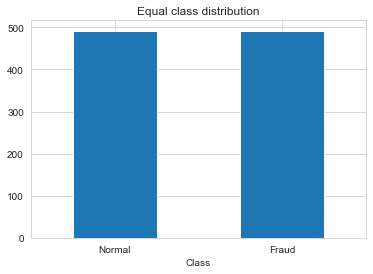

In [262]:

count_class=pd.value_counts(new_df['Class'],sort=True)
count_class.plot(kind='bar',rot=0)
plt.title('Equal class distribution')
LABELS=['Normal','Fraud']
plt.xticks(range(2),LABELS)
plt.xlabel('Class')

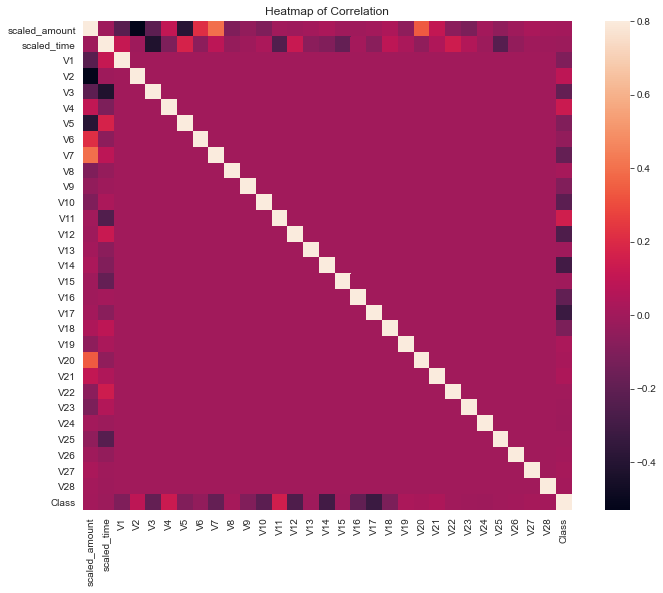

In [263]:
#Correlation matrix:to check strong corellation between different variables in our dataset
#also tells us if there are strong linear relationships
#also tells us which features are important for overall classification
corrmat=data.corr()
fig=plt.figure(figsize=(12,9))
sns.heatmap(corrmat,vmax=0.8,square=True)
plt.title('Heatmap of Correlation')
plt.show()

we have a lot of values very close to 0.there is no strong relationship between most of the v parameters(i.e from v1 to v28).there is variation in relationship between different parameters with the class.the lighter ones have the positive correlation whereas the darker ones have negative correlation
we can conclude that V10,V12,V14 and V17 are highly negatively correlated to class and V2,V4,V11 and V19 are highly positively correalted to class.

3- Data Cleansing
We have identified the input features and the target variable so we will separate them into two objects ‘X’ and ‘y’ and draw the histogram of all the input features to see the data at a glance.
 The target variable which we would like to predict, is the 'Class' variable

In [264]:

# define X and y variables
x = data.loc[:, data.columns != 'Class']
y = data.loc[:, data.columns == 'Class']
print(x.shape)
print(y.shape)

(284807, 30)
(284807, 1)


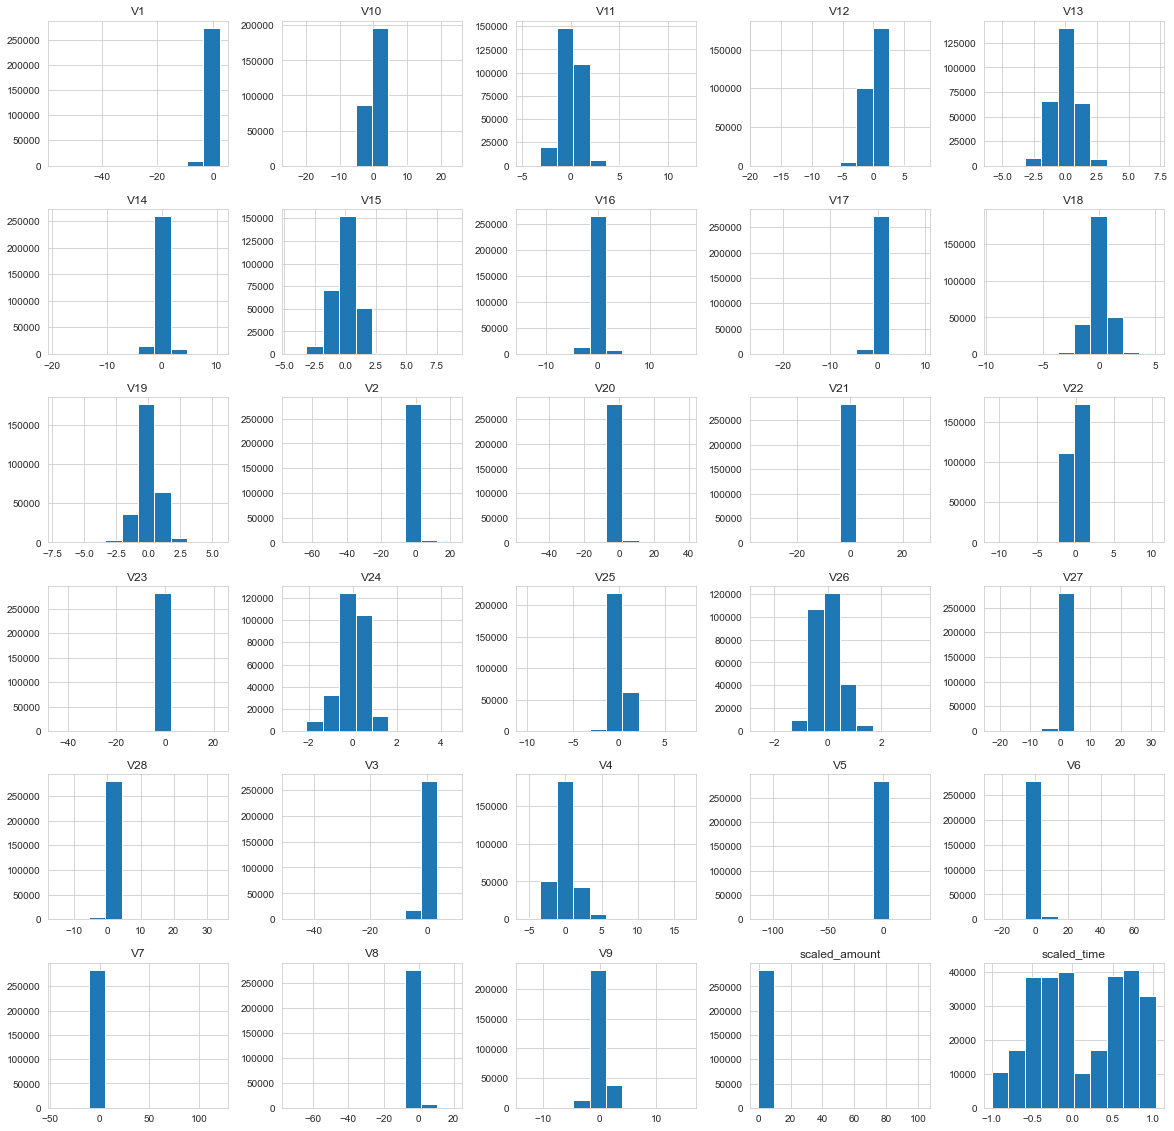

In [265]:
# Plot histograms of each parameter 
x.hist(figsize = (20, 20))
plt.show()

BoxPlots: We will use boxplots to have a better understanding of the distribution of these features in fradulent and non fradulent transactions.

Visualization of correlations using boxplot

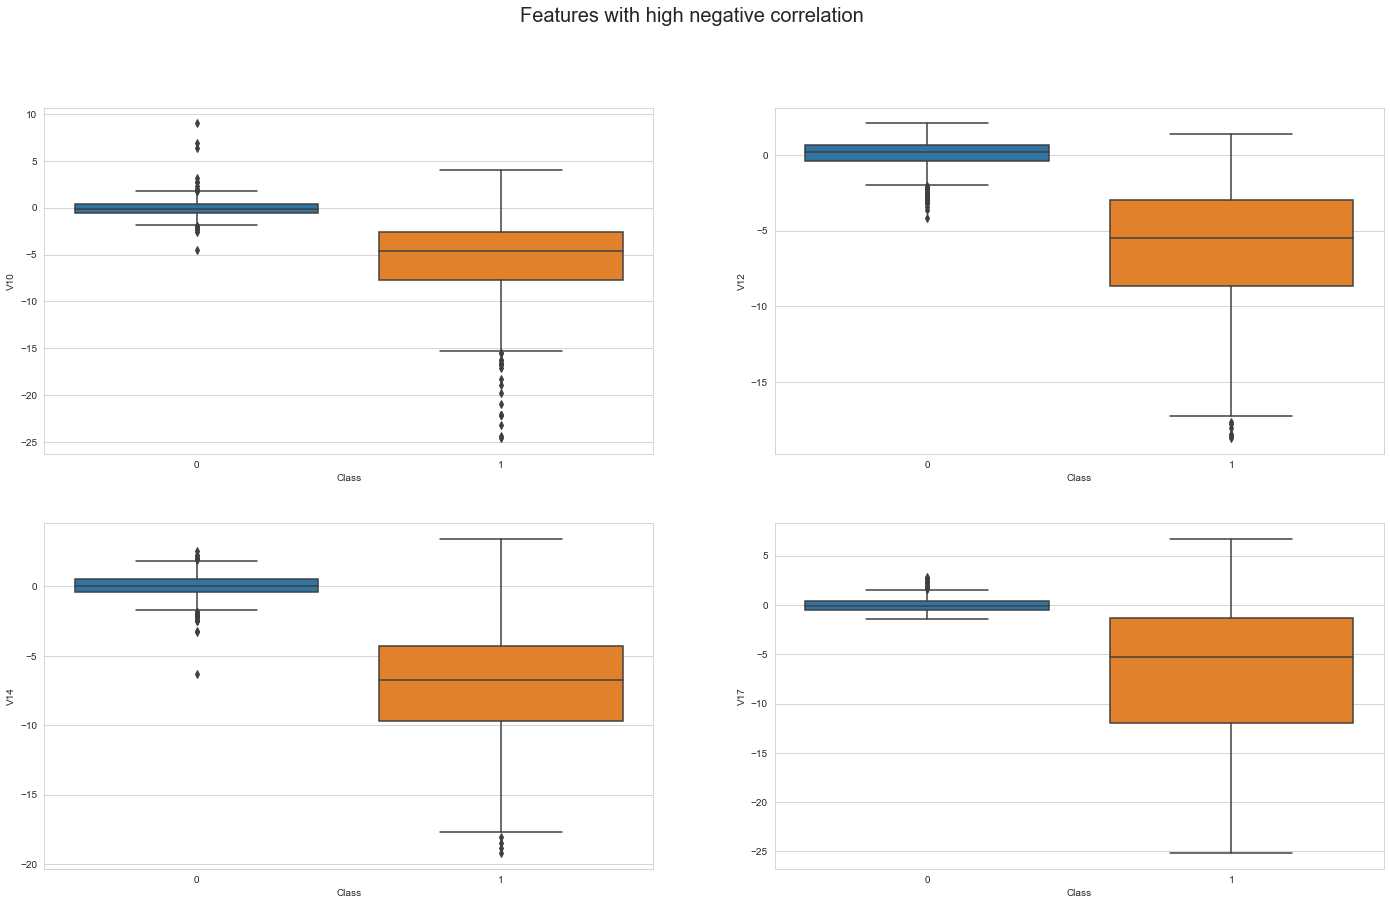

In [266]:
f,ax=plt.subplots(2,2,figsize=(24,14))
f.suptitle('Features with high negative correlation',size=20)
sns.boxplot(x='Class',y='V10',data=new_df,ax=ax[0,0])
sns.boxplot(x='Class',y='V12',data=new_df,ax=ax[0,1])
sns.boxplot(x='Class',y='V14',data=new_df,ax=ax[1,0])
sns.boxplot(x='Class',y='V17',data=new_df,ax=ax[1,1])

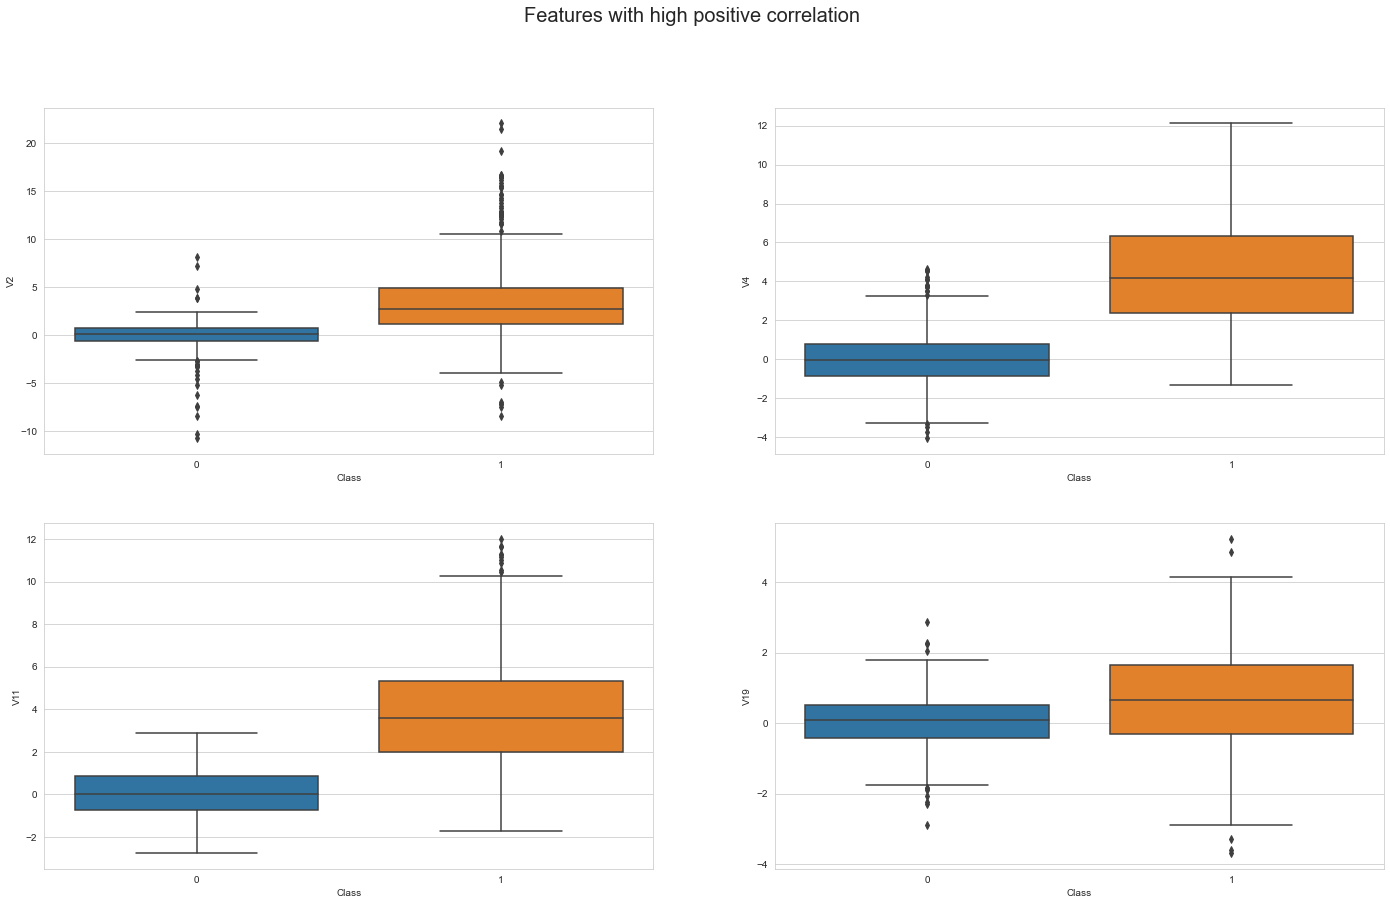

In [267]:
f,ax=plt.subplots(2,2,figsize=(24,14))
f.suptitle('Features with high positive correlation',size=20)
sns.boxplot(x='Class',y='V2',data=new_df,ax=ax[0,0])
sns.boxplot(x='Class',y='V4',data=new_df,ax=ax[0,1])
sns.boxplot(x='Class',y='V11',data=new_df,ax=ax[1,0])
sns.boxplot(x='Class',y='V19',data=new_df,ax=ax[1,1])

Remove the extreme outliers from features that have a high correlation with our classes.

In [268]:
v14_fraud = new_df['V14'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v14_fraud, 25), np.percentile(v14_fraud, 75)
v14_iqr = q75 - q25
v14_cut_off = v14_iqr * 1.5
v14_lower, v14_upper = q25 - v14_cut_off, q75 + v14_cut_off
new_df = new_df.drop(new_df[(new_df['V14'] > v14_upper) | (new_df['V14'] < v14_lower)].index)


v12_fraud = new_df['V12'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v12_fraud, 25), np.percentile(v12_fraud, 75)
v12_iqr = q75 - q25

v12_cut_off = v12_iqr * 1.5
v12_lower, v12_upper = q25 - v12_cut_off, q75 + v12_cut_off
new_df = new_df.drop(new_df[(new_df['V12'] > v12_upper) | (new_df['V12'] < v12_lower)].index)



v10_fraud = new_df['V10'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v10_fraud, 25), np.percentile(v10_fraud, 75)
v10_iqr = q75 - q25

v10_cut_off = v10_iqr * 1.5
v10_lower, v10_upper = q25 - v10_cut_off, q75 + v10_cut_off

new_df = new_df.drop(new_df[(new_df['V10'] > v10_upper) | (new_df['V10'] < v10_lower)].index)

Classifier:An algorithm that maps the input data to a specific category.Classification is a type of supervised learning.
The training data is used to make sure the machine recognizes patterns in the data and the test data is used only to access performance of model.

In [269]:
X=new_df.drop('Class',axis=1) 
y=new_df['Class']

In [270]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

Model Architecture

Import the required classifiers

In [271]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [272]:
#Logistic Regression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
#Support Vector Classifier
svc=SVC()
svc.fit(X_train,y_train)
#K-nearest neighbors
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
#Random Forest Classifier
RDF_Classifier=RandomForestClassifier(random_state=0)
RDF_Classifier.fit(X_train,y_train)
#DecisionTreeClassifier
DecisionTreeClassifier= DecisionTreeClassifier()
DecisionTreeClassifier.fit(X_train,y_train)

DecisionTreeClassifier()

Model Evaluation and Prediction

In [273]:

models_list=[('Logistic Regression',logmodel),('SVC',svc),('KNeighborsClassifier',knn),('RFC',RDF_Classifier),('DecisionTreeClassifier',DecisionTreeClassifier)]
models=[j for j in models_list]
print()
#print('===========================Model Evaluation Results================================')
for i,v in models:
      print('==========================={}=========================================='.format(i))
      a=cross_val_score(v, X_train, y_train, cv=5)
      print('Cross validation score=',a.mean())


===========================Logistic Regression==========================================
Cross validation score= 0.9418089926803763
===========================SVC==========================================
Cross validation score= 0.9259149529452773
===========================KNeighborsClassifier==========================================
Cross validation score= 0.9298623213663297
===========================RFC==========================================
Cross validation score= 0.9338532589752525
===========================DecisionTreeClassifier==========================================
Cross validation score= 0.9008103868943882


Test Models

In [274]:
models_list=[('Logistic Regression',logmodel),('SVC',svc),('KNeighborsClassifier',knn),('RFC',RDF_Classifier),('DecisionTreeClassifier',DecisionTreeClassifier)]
models=[j for j in models_list]
print()
print('===========================Model Test Results================================')
for i,v in models:
      print('==========================={}=========================================='.format(i))
      pred_test = v.predict(X_test)
      print('Accuracy =',accuracy_score(y_test,pred_test))
      print('Confusion Matrix')
      print(confusion_matrix(y_test,pred_test))
      print('Classification Report')
      print(classification_report(y_test,pred_test))


===========================Model Test Results================================
===========================Logistic Regression==========================================
Accuracy = 0.968421052631579
Confusion Matrix
[[93  4]
 [ 2 91]]
Classification Report
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        97
           1       0.96      0.98      0.97        93

    accuracy                           0.97       190
   macro avg       0.97      0.97      0.97       190
weighted avg       0.97      0.97      0.97       190

===========================SVC==========================================
Accuracy = 0.9526315789473684
Confusion Matrix
[[95  2]
 [ 7 86]]
Classification Report
              precision    recall  f1-score   support

           0       0.93      0.98      0.95        97
           1       0.98      0.92      0.95        93

    accuracy                           0.95       190
   macro avg       0.95      0.95      